# PROBLEM STATEMENT

You have been hired as a consultant to a start-up that is running a targetted marketing ads on facebook. The company wants to anaylze customer behaviour by predicting which customer clicks on the advertisement. Customer data is as follows: 

Inputs: 
- Name 
- e-mail 
- Country 
- Time on Facebook 
- Estimated Salary (derived from other parameters)

Outputs:
- Click (1: customer clicked on Ad, 0: Customer did not click on the Ad)

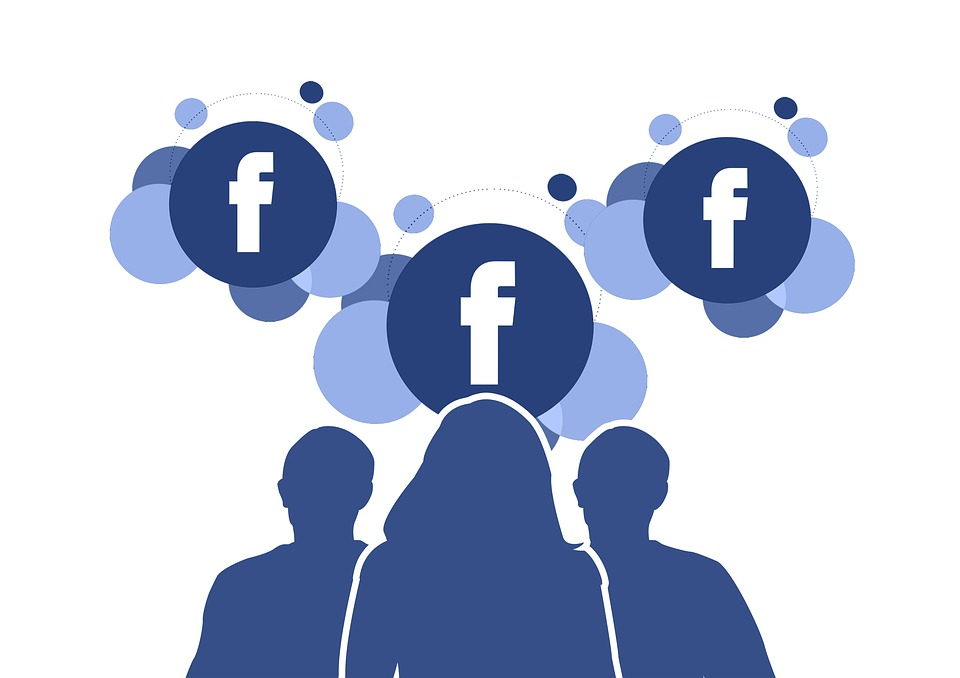

# STEP #0: LIBRARIES IMPORT


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #1: IMPORT DATASET

In [2]:
df = pd.read_csv("Facebook_Ads_2.csv",encoding='latin-1')

In [3]:
df.head()

Names                                             emails  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        Country  Time Spent on Site       Salary  Clicked  
0      Bulgaria           25.649648  55330.06006        0  
1        Belize           32.456107  79049.07674        1  
2       Algeria           20.945978  41098.60826        0  
3  Cook Islands           54.039325  37143.35536        1  
4        Brazil           34.249729  37355.11276        0

In [4]:
df.tail()

Names                                   emails                Country  \
494   Rigel  egestas.blandit.Nam@semvitaealiquam.com  Sao Tome and Principe   
495  Walter                      ligula@Cumsociis.ca                  Nepal   
496   Vanna       Cum.sociis.natoque@Sedmolestie.edu               Zimbabwe   
497   Pearl            penatibus.et@massanonante.com            Philippines   
498    Nell        Quisque.varius@arcuVivamussit.net               Botswana   

     Time Spent on Site       Salary  Clicked  
494           19.222746  44969.13495        0  
495           22.665662  41686.20425        0  
496           35.320239  23989.80864        0  
497           26.539170  31708.57054        0  
498           32.386148  74331.35442        1

# STEP #2: EXPLORE/VISUALIZE DATASET

In [5]:
click_1 = df[df['Clicked']==1]
click_0 = df[df['Clicked']==0]

In [6]:
print('Total = ',len(df))
print('Number of customers who clicked on Ad = ',len(click_1))
print('Percentage Clicked = ', 1.* len(click_1)/len(df) * 100, "%")
print('Did not click =', len(click_0))
print('Percentage who did not Click = ', 1.* len(click_0)/len(df) * 100, "%")

Total =  499
Number of customers who clicked on Ad =  250
Percentage Clicked =  50.1002004008016 %
Did not click = 249
Percentage who did not Click =  49.899799599198396 %


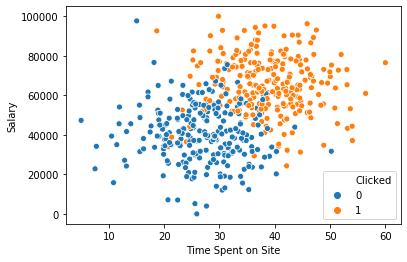

In [7]:
sns.scatterplot(df['Time Spent on Site'], df['Salary'], hue = df['Clicked'])

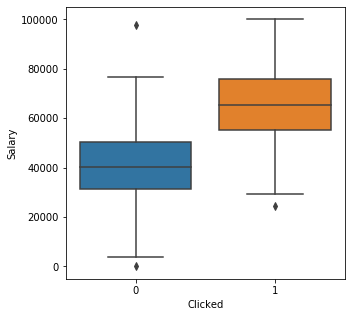

In [8]:
plt.figure(figsize = [5,5])
sns.boxplot(df['Clicked'], df['Salary'])

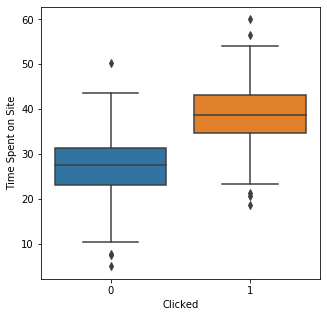

In [9]:
plt.figure(figsize = [5,5])
sns.boxplot(df['Clicked'], df['Time Spent on Site'])

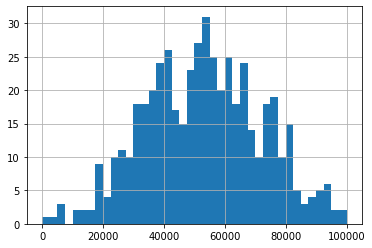

In [10]:
df['Salary'].hist(bins = 40)

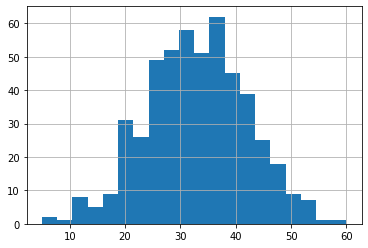

In [11]:
df['Time Spent on Site'].hist(bins = 20)

# STEP #3: PREPARE THE DATA FOR TRAINING/ DATA CLEANING 

In [12]:
df

Names                                             emails  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
494            Rigel            egestas.blandit.Nam@semvitaealiquam.com   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   

                   Country  Time Spent on Site       Salary  Clicked  
0                 Bulgaria           25.649648  55330.06006        0  
1                   Belize           32.456107  79049.07674        1  
2                  Algeria           20.945978  41098.60826        0  
3             Cook Islands           54.039325  37143.35536        1  
4                   Brazil           34.249729  37355.11276        0  
..                     ...                 ...          ...      ...  
494  Sao Tome and Principe           19.222746  44969.13495        0  
495                  Nepal           22.665662  41686.20425        0  
496               Zimbabwe           35.320239  23989.80864        0  
497            Philippines           26.539170  31708.57054        0  
498               Botswana           32.386148  74331.35442        1  

[499 rows x 6 columns]

In [13]:
#Let's drop the emails, country and names (we can make use of the country later!)
df.drop( ['emails' , 'Country', 'Names'], axis = 1 , inplace = True)

In [14]:
df

Time Spent on Site       Salary  Clicked
0             25.649648  55330.06006        0
1             32.456107  79049.07674        1
2             20.945978  41098.60826        0
3             54.039325  37143.35536        1
4             34.249729  37355.11276        0
..                  ...          ...      ...
494           19.222746  44969.13495        0
495           22.665662  41686.20425        0
496           35.320239  23989.80864        0
497           26.539170  31708.57054        0
498           32.386148  74331.35442        1

[499 rows x 3 columns]

In [15]:
#Let's drop the target coloumn before we do train test split
y = df['Clicked'].values
X = df.drop('Clicked', axis = 1).values

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# STEP#4: MODEL TRAINING

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20 )

In [19]:
X_train

array([[-0.18398561,  1.22125527],
       [-1.26962083, -0.73986738],
       [-0.61363824, -0.59778295],
       [ 0.31954163, -0.74813662],
       [-0.28915176,  0.64496102],
       [ 1.51842223,  0.89718213],
       [-1.90921852,  0.11364795],
       [-1.34212381, -0.99650999],
       [ 0.20117316, -0.20263885],
       [-1.53083648, -0.10620659],
       [ 1.05223712,  0.79901094],
       [-1.38883228, -0.41562641],
       [-0.02208034, -0.76587725],
       [ 0.64614513,  1.05983228],
       [ 0.26439697,  1.54909798],
       [ 0.00638604,  1.4662439 ],
       [-0.27809384,  0.34909791],
       [ 1.02626226,  0.72045007],
       [ 0.52273019,  0.48167755],
       [-0.23501707, -1.40143134],
       [-0.83055831, -0.82787845],
       [-1.38412304, -0.78225994],
       [ 0.38863674, -0.20000695],
       [ 0.47922998, -0.14434506],
       [ 1.42362615,  2.2829456 ],
       [ 1.26919024,  0.5370107 ],
       [ 0.55912809,  0.53281346],
       [-0.71582392,  0.13134965],
       [-0.34839402,

In [20]:
y_train

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,

In [21]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# STEP#5: MODEL TESTING

In [22]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,

In [23]:
y_train

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,

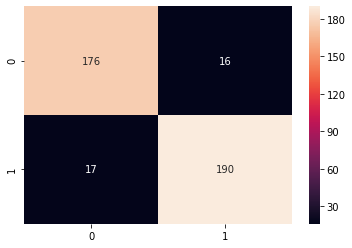

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm , annot = True, fmt = "d")

In [25]:
y_pred_test = classifier.predict(X_test)
y_pred_test

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

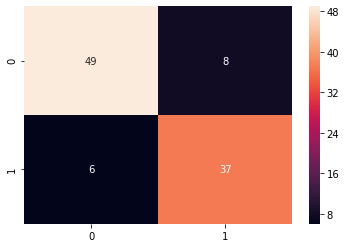

In [26]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm , annot = True ,fmt = "d")

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        57
           1       0.82      0.86      0.84        43

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



# STEP #6: VISUALIZING TRAINING AND TESTING DATASETS

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


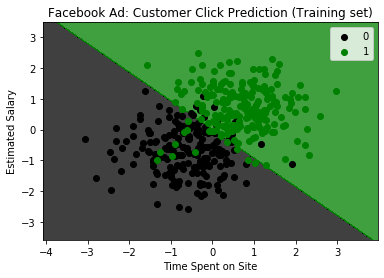

In [28]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('black', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'green'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


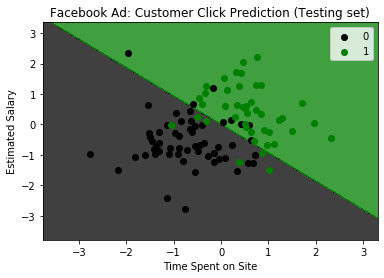

In [29]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('black', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'green'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# EXCELLENT JOB! NOW YOU'VE BECOME EXPERT IN LOGISTIC REGRESSION